<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/statistical_analysis/result_analysis/results_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import scikitplot as skplt
from sklearn import metrics


In [3]:
results = pd.read_excel('Dados_Ex2.xlsx')
results.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 501 entries, (nan, nan) to (nan, nan)
Data columns (total 3 columns):
Target        500 non-null float64
Unnamed: 1    0 non-null float64
Resposta      500 non-null float64
dtypes: float64(3)
memory usage: 12.8 KB


In [4]:
results = results.drop(columns=['Unnamed: 1'])
results.reset_index(drop=True,inplace=True)
results.dropna(inplace=True)
results.head()


,Target,Resposta
1,0.0,0.30
2,0.0,0.20
3,1.0,0.28
4,1.0,0.88
5,0.0,0.50


In [0]:
target_positive = results[results['Target'] == 1]
target_negative = results[results['Target'] == 0]

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


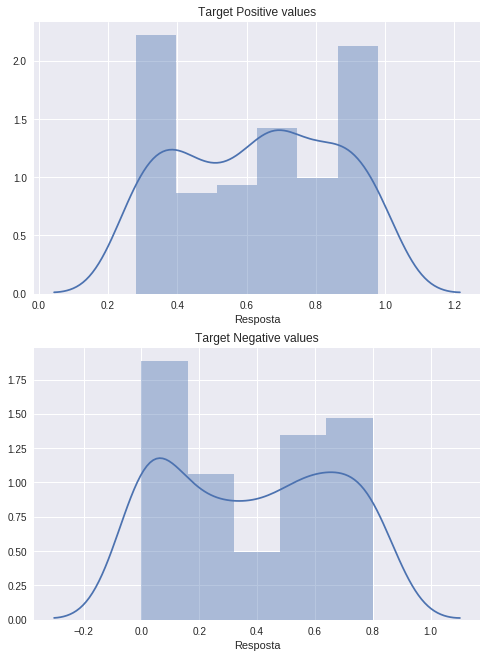

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax_1 = sns.distplot(target_positive['Resposta'], ax=ax[0])
ax_1.set_title('Target Positive values')


ax_2 = sns.distplot(target_negative['Resposta'], ax=ax[1])
ax_2.set_title('Target Negative values')

plt.plot()
plt.show()

In [0]:
def get_positive(tresh_hold = 0.5):
  true_positive = target_positive[target_positive['Resposta'] >= tresh_hold]
  false_positive = target_positive[target_positive['Resposta'] < tresh_hold] 
  
  return len(true_positive), len(false_positive)

In [0]:
def get_negative(tresh_hold = 0.5):
  true_negative = target_negative[target_negative['Resposta'] <= tresh_hold]
  false_negative = target_negative[target_negative['Resposta'] > tresh_hold] 
  
  return len(true_negative), len(false_negative)

In [0]:
'''
Calculates:
Acuracy
Positive and Negative Precision
False Positive and False Negative Amount

@param true_positive amount of True Positive in the dataset.
@oaran true_negative amount of True Negative in the dataset.
@param false_positive amount of False Positive in the dataset.
@param false_negative amount of False Negative in the dataset.
@param positives Total of Positives targets, targets = 1
@param negatives Total of Negatives targets, targets = 0
@param Threshold Value used to calc the true, false positives and negatives
@param debug Default False, if True print all stats

'''
def calc_stats(true_positive, 
               true_negative, 
               false_positive, 
               false_negative, 
               positives, 
               negatives, 
               threshold, 
               debug=False):
  
  acuracy = (true_positive + true_negative)/ (positives + negatives)

  precision_positive = true_positive / (true_positive + false_positive)
  precision_negative = true_negative / (true_negative + false_negative)

  false_positive_amount = false_positive / negatives
  false_negative_amount = false_negative / positives
  if debug == True:
    print('Threshold: '+str(threshold))
    print('Acuracy: '+str(acuracy))
    print('Positive Precision: '+str(precision_positive))
    print('Negative Precision: '+str(precision_negative))
    print('Amount False Positives: '+str(false_positive_amount))
    print('Amount False Negatives: '+str(false_negative_amount))
    print('\n')
  
  return acuracy


In [10]:
threshold = [0.0, 
             0.1, 0.2, 
             0.3, 0.4, 
             0.5, 0.6,
             0.7, 0.8,
             0.9, 1.0]

for t in threshold:
  true_positive, false_positive = get_positive(t)
  true_negative, false_negative = get_negative(t)

  
  calc_stats(true_positive, 
             true_negative, 
             false_positive, 
             false_negative, 
             len(target_positive), 
             len(target_negative),
             t, True)
  

Threshold: 0.0
Acuracy: 0.606
Positive Precision: 1.0
Negative Precision: 0.1859504132231405
Amount False Positives: 0.0
Amount False Negatives: 0.7635658914728682


Threshold: 0.1
Acuracy: 0.662
Positive Precision: 1.0
Negative Precision: 0.30165289256198347
Amount False Positives: 0.0
Amount False Negatives: 0.6550387596899225


Threshold: 0.2
Acuracy: 0.7
Positive Precision: 1.0
Negative Precision: 0.38016528925619836
Amount False Positives: 0.0
Amount False Negatives: 0.5813953488372093


Threshold: 0.3
Acuracy: 0.684
Positive Precision: 0.8837209302325582
Negative Precision: 0.47107438016528924
Amount False Positives: 0.12396694214876033
Amount False Negatives: 0.49612403100775193


Threshold: 0.4
Acuracy: 0.648
Positive Precision: 0.7403100775193798
Negative Precision: 0.5495867768595041
Amount False Positives: 0.2768595041322314
Amount False Negatives: 0.42248062015503873


Threshold: 0.5
Acuracy: 0.642
Positive Precision: 0.6395348837209303
Negative Precision: 0.644628099173553

In [0]:
tresh_hold = []
for it in results['Resposta']:
  if it <= 0.7:
     tresh_hold.append(0)
  else:
     tresh_hold.append(1)
      

matrix_cf = pd.DataFrame(metrics.confusion_matrix(results['Target'], tresh_hold), 
                         index=['Negative', 'Positive'],
                         columns=['True', 'False'])

Text(0.5, 1.0, 'Consfuison Matrix')

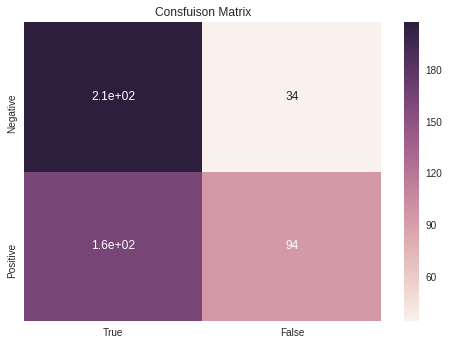

In [27]:
fig, ax = plt.subplots()
ax = sns.heatmap(matrix_cf, annot=True)
ax.set_title('Consfuison Matrix')

In [0]:
y = results['Target']
scores = results['Resposta']
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

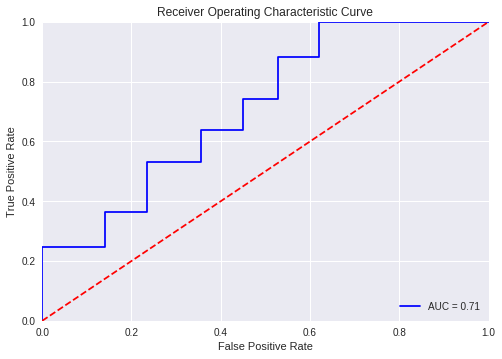

In [13]:
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()